# Повторение основ :)

# Линейная регрессия

Обозначения:
- $\mathbb{X} \in \mathbb{R}^{n \times m}$ - матрица признаков
- $\mathbb{Y} \in \mathbb{R}^n$ - целевая переменная
- $x \in \mathbb{R}^{m}$ - один объект из выборки
- $\omega = (\omega_1,...,\omega_m)$ - вектор весов (параметров) модели
- $Q(f, \mathbb{Y})$ - функционал ошибок

Общий вид модели: $f(x, \omega) = \omega_0 + x_1\omega_1 + ... + x_m\omega_m = \sum\limits_{i=0}^{m}x_i\omega_i = <x, \omega>$

**Пример**
![lin_reg](./example_lin_reg.png)
<p style="text-align: center;"></p>

**Как делали до этого?**

import sklearn

model = sklearn.LinReg(params) \
model.fit(X_train, y_train) \
model.predict(X_test) 

___Готово!___

Давайте разберёмся, как это работает под капотом

# Немного теории оптимизаций

Пусть $f$ - векторная функция.

$\nabla f = \big(\dfrac{\partial f}{\partial x_1},...,\dfrac{\partial f}{\partial x_n} \big)$.\
Градиент показывает направление __наискорейшего роста__ функции.\
В задачах машинного обучения мы хотим минимизировать некоторый функционал ошибок. Поможет ли в этом градиент?

___Ваш ответ:___ $-\nabla f$

![rm](./rik_and_morti.jpeg)
<p style="text-align: center;"></p>

In [108]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Классический градиентный спуск

$-\nabla_{\omega}Q$ - вектор, направленный в сторону наискорешего убывания.

Тогда можем задать рекуррентную формулу:

$\omega^{(k)} = \omega^{(k - 1)} - \eta \nabla_{\omega}Q(\omega^{(k-1)})$

Где $\eta$ - шаг нашего спуска.

В двухмерном виде выглядит так:

![grad](./grad.png)
<p style="text-align: center;"></p>

Открытые вопросы: 
- Как задавать $\omega^{(0)}$?
- Когда останавливаться?

___Ваша заметка:___

$\omega^{(0)}$ - рандомим

Останавливаемся: задаем количество шагов спуска

# Stochastic Gradient Descent 

$Q(f, \mathbb{Y}) = \dfrac{1}{n}\sum\limits_{i=1}^{n}q_i(x_i, \omega, y_i)$

$\nabla_{\omega}Q = \dfrac{1}{n}\sum\limits_{i=1}^{n}\nabla_{\omega}q_i$

Вычисляем градиенты n раз!

$\nabla_{\omega}Q \approx \nabla_{\omega}q_i$

Тогда:

$\omega^{(k)} = \omega^{(k-1)} - \eta_k \nabla_{\omega}q_{i_k}(\omega^{(k-1)})$, где $i_k$ - номер случайного элемента из выборки на $k$-ом шаге

___Теорема___:
Сходимость SGD гарантируется, если выполнены условия:
- $\sum\limits_{k=1}^{\infty}\eta_k$ - расходится
- $\sum\limits_{k=1}^{\infty}\eta_k^2$ - сходится

Например, можно брать последовательность $\eta_k = \dfrac{1}{k}$

# Пишем свою модель

Будем собирать нашу модель по кусочкам. Напишем и потестируем градиентный спуск.

Функионал ошибок: $Q = MSE = \sum\limits_{i}(y_i-x_i^T \omega)^2 = ||\mathbb{Y} - \mathbb{X}\omega||_2^2$

<p style="text-align: center;">$\omega_{opt} = (\mathbb{X}^T\mathbb{X})^{-1}\mathbb{X}\mathbb{Y}$</p>

Найдём шаг градиентного спуска

$||\mathbb{Y} - \mathbb{X}\omega||_2^2 = <\mathbb{Y} - \mathbb{X}\omega, \mathbb{Y} - \mathbb{X}\omega>$

Дифференциал для векторной функции: $df(x)\big|_{x_0} = <\nabla f(x), x_0>$

Формула дифференциала скалярного произведения: $d(<u, v>)\big|_{\omega} = <d(u)|_{\omega}, v> + <u, d(v)|_{\omega}>$

$dQ\big|_{\omega_{*}} = 2<d(\mathbb{Y} - \mathbb{X}\omega)\big|_{\omega_{*}}, \mathbb{Y} - \mathbb{X}\omega>$

$dQ\big|_{\omega_{*}} = -2<\mathbb{Y} - \mathbb{X}\omega, \mathbb{X}\omega_{*}> = -2\mathbb{X}^T<\mathbb{Y} - \mathbb{X}\omega, \omega_{*}>$

$\nabla_{\omega}Q = -2\mathbb{X}^T(\mathbb{Y} - \mathbb{X}\omega) = 2\mathbb{X}^T(\mathbb{X}\omega - \mathbb{Y})$

In [109]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import warnings
from sklearn.base import BaseEstimator, ClassifierMixin
warnings.filterwarnings("ignore")

In [110]:
random_seed = 43
n_features = 2
n_objects = 300
batch_size = 10
num_steps = 50
np.random.seed(random_seed)

# Генерим истинные веса
w_true = np.random.normal(size=(n_features, ))

# Под веса создаем признаки
X = np.random.uniform(-5, 5, (n_objects, n_features))

X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :] 

# Создаем таргет
Y = X.dot(w_true) + np.random.normal(0, 1, n_objects)

In [111]:
# Пишем градиентный спуск

w_0 = np.random.uniform(-2, 2, n_features)-0.5
w = w_0.copy()
w_list = [w.copy()]
learning_rate = 1e-2

for i in range(num_steps):
    w -= 2 * learning_rate * np.dot(X.T, np.dot(X, w) - Y) / Y.size
    w_list.append(w.copy())
    
w_list = np.array(w_list)

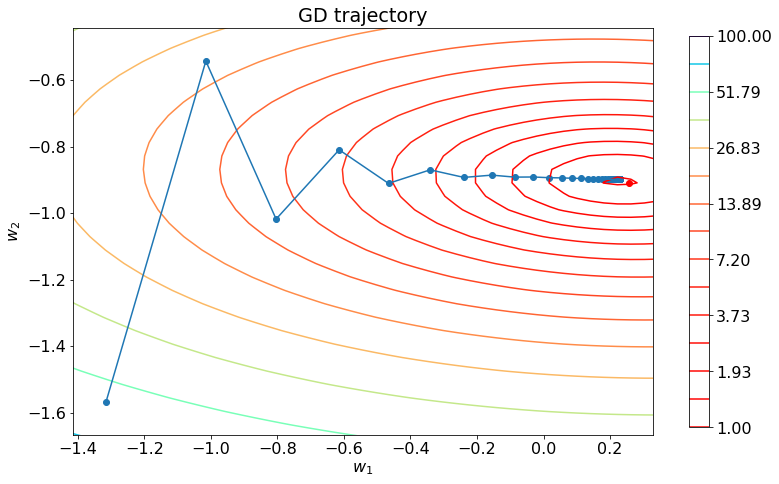

In [112]:
matplotlib.rcParams.update({'font.size': 16})

# Визуализируем градиентный спуск
A, B = np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-2, 2, 100))

levels = np.empty_like(A)
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        w_tmp = np.array([A[i, j], B[i, j]])
        levels[i, j] = np.mean(np.power(np.dot(X, w_tmp) - Y, 2))

plt.figure(figsize=(13, 9))
plt.title('GD trajectory')
plt.xlabel('$w_1$')
plt.ylabel('$w_2$')
plt.xlim(w_list[:, 0].min() - 0.1, w_list[:, 0].max() + 0.1)
plt.ylim(w_list[:, 1].min() - 0.1, w_list[:, 1].max() + 0.1)
plt.gca().set_aspect('equal')

CS = plt.contour(A, B, levels, levels=np.logspace(0, 2, num=15), cmap=plt.cm.rainbow_r)
CB = plt.colorbar(CS, shrink=0.8, extend='both')

plt.scatter(w_true[0], w_true[1], c='r')
plt.scatter(w_list[:, 0], w_list[:, 1])
plt.plot(w_list[:, 0], w_list[:, 1])

plt.show()

# Напишем SGD

In [113]:
np.random.seed(random_seed)
w = w_0.copy()
w_list = [w.copy()]
lr_0 = 0.02
batch_size = 10

for i in range(num_steps):
    lr = lr_0 / (i+1)
    sample_indices = np.random.randint(n_objects, size=batch_size)
    w -= 2 * lr * np.dot(X[sample_indices].T, np.dot(X[sample_indices], w) - Y[sample_indices]) / batch_size
    w_list.append(w.copy())
w_list = np.array(w_list)

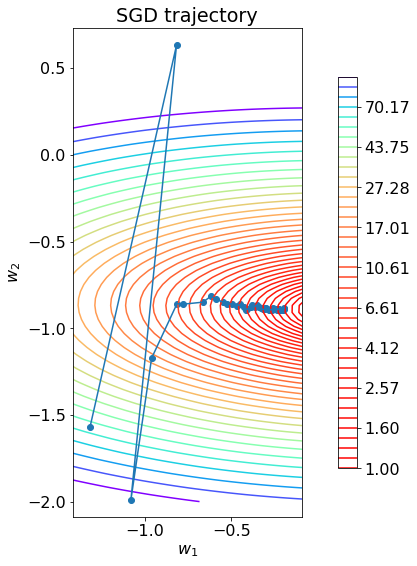

In [114]:
A, B = np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-2, 2, 100))

levels = np.empty_like(A)
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        w_tmp = np.array([A[i, j], B[i, j]])
        levels[i, j] = np.mean(np.power(np.dot(X, w_tmp) - Y, 2))

plt.figure(figsize=(13, 9))
plt.title('SGD trajectory')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')
plt.xlim((w_list[:, 0].min() - 0.1, w_list[:, 0].max() + 0.1))
plt.ylim((w_list[:, 1].min() - 0.1, w_list[:, 1].max() + 0.1))
plt.gca().set_aspect('equal')

# visualize the level set
CS = plt.contour(A, B, levels, levels=np.logspace(0, 2, num=40), cmap=plt.cm.rainbow_r)
CB = plt.colorbar(CS, shrink=0.8, extend='both')

# visualize trajectory
plt.scatter(w_true[0], w_true[1], c='r')
plt.scatter(w_list[:, 0], w_list[:, 1])
plt.plot(w_list[:, 0], w_list[:, 1])

plt.show()

# Реализуем полностью нашу собственную модель линейной регрессии

In [115]:
from sklearn.base import BaseEstimator, RegressorMixin

class LinReg(BaseEstimator, RegressorMixin):
    
    def __init__(self, batch_size=25, num_steps=350, lr=1e-2):
        self.batch_size = batch_size
        self.num_steps = num_steps
        self.lr = lr

    def fit(self, X, Y):
        w = np.random.randn(X.shape[1])[:, None]
        n_objects = len(X)

        for i in range(self.num_steps):
            sample_indices = np.random.randint(0, n_objects, size=batch_size)
            w -= 2 * self.lr * np.dot(X[sample_indices].T, np.dot(X[sample_indices], w) - Y[sample_indices]) / self.batch_size

        self.w = w
        return self

    def predict(self, X):
        return X@self.w

___Задание___: 
- Реализовать свою модель линейной регрессии с регуляризацией и сравнить с моделью Ridge

# Сравним с моделью из коробки

In [116]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

#Генерация данных для тестирования
n_features = 700
n_objects = 100000

w_true = np.random.uniform(-2, 2, (n_features, 1))

X = np.random.uniform(-100, 100, (n_objects, n_features)) * np.arange(n_features)
Y = X.dot(w_true) + np.random.normal(0, 10, (n_objects, 1))

In [117]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y)

In [118]:
scaler = StandardScaler()
scaler.fit(x_train)
x_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

Сравним модели по $R^2 score$.

<p style="text-align: center;">$R^2 = 1 - \dfrac{\sum\limits_{i}(y_i - f(x_i, \omega))^2}{\sum\limits_{i}(y_i - y_{mean})^2}$</p>

$R^2 score$ показывает насколько наша модель хорошо описывает данные

In [119]:
own_model = LinReg().fit(x_scaled, y_train)
y_pred = own_model.predict(x_test_scaled)
own_r2 = r2_score(y_test, y_pred)

sklearn_model = LinearRegression().fit(x_scaled, y_train)
y_pred = sklearn_model.predict(x_test_scaled)

sklearn_r2 = r2_score(y_test, y_pred)
print('R^2 in own model:', own_r2)
print('R^2 in sklearn loss:', sklearn_r2)

R^2 in own model: 0.9820457476940697
R^2 in sklearn loss: 0.9999999998181076


# Линейная классификация

Рассмотрим задачу бинарной классификации, пусть целевая переменная $y_i \in \{+1, -1\}$

В задачах линейной классификации мы исходим из предположения о линейной разделимости выборки:

![lin_class](./lin_sample.jpeg)
<p style="text-align: center;"></p>

Исходя из этого, наша модель имеет вид:

___Ваш ответ___: sign(<x, w>)

# Обучение линейного классификатора

Введём функционал ошибок: $Q = \dfrac{1}{n}\sum\limits_{i=1}^{n}[f(x_i, \omega) \neq y_i]$ - плохо

$Q = \dfrac{1}{n}\sum\limits_{i=1}^{n}[f(x_i, \omega) \neq y_i] < \dfrac{1}{n}\sum\limits_{i=1}^{n}L(x_i, \omega, y_i)$

# Логистическая регрессия

Хотим предсказывать не класс нашего объекта, а вероятность, что он принадлежит к классу +1, то есть $f(x_i) = \mathbb{P}(y_i = +1 | x_i)$

Зададим функцию правдоподобия:

$\mathcal{L} = \prod\limits_{i=1}^{n}f(x_i)^{[y_i=+1]}(1-f(x_i))^{[y_i = -1]}$

$-log\mathcal{L} = -\sum\limits_{i=1}^{n}\big(  [y_i=+1]logf(x) + [y_i=-1]log(1 - f(x)) \big)$

$L = [y_i=+1]logf(x) + [y_i=-1]log(1 - f(x))$

$\sigma(x) = \dfrac{1}{1 + e^{-x}}$

![sigmoid](./sigmoid.png)
<p style="text-align: center;"></p>

Если в качестве $f(x)$ взять $f(x) = \sigma(<x, \omega>)$, то $log-loss = \dfrac{1}{n}\sum\limits_{i=1}^{n}log(1 + e^{y_i<x_i, \omega>})$ 

___Задание___: написать свою логистическую регрессию

# **Домашняя работа**

**Градиент:**
$$
\frac{\partial{L}}{\partial{w}}
= \left(-\frac{y}{y_{pred}} + \frac{1-y}{1-y_{pred}}\right)\frac{\partial{y_{pred}}}{\partial{w}}
$$

$$
\frac{\partial{y_{pred}}}{\partial{w}} = \frac{1}{(1+e^{-\langle x, w \rangle})^2} e^{-\langle x, w \rangle} (-x) = -y_{pred}(1-y_{pred})x
$$

$$
\frac{\partial{L}}{\partial{w}} = (y_{pred} - y) x
$$

In [134]:
class LogReg(BaseEstimator, ClassifierMixin):

    def __sigma(self, t):
        t = np.clip(t, -10, 10)
        return 1 / (1 + np.exp(-t))
    
    def __init__(self, **kwargs):
        #Коэф. регуляризации
        self.alpha = kwargs.get('alpha', 1)               
        # Скорость спуска
        self.max_epoch = kwargs.get('max_epoch', 10)      
        #Максимальное количество эпох при обучении модели
        self.chunk_size = kwargs.get('chunk_size', 5)     
        #Количество элементов в чанке (от 1 до общего числа точек)
        self.min_err = kwargs.get('min_err', 0.1)        
        self.penalty = 0

        self.theta = None
        
    #Обучение модели
    def fit(self, X, y=None):
        eps = 1e-15
        n, m = X.shape   

        sigma = self.__sigma
        chunk_size = self.chunk_size
        
        X_b = np.c_[X, np.ones(n)]
        self.theta = np.random.randn(m + 1, 1)
        Y = np.vstack(y)

        for epoch in range(self.max_epoch):
            lst = list(range(n))
            np.random.shuffle(lst)
            chunks = [lst[i : i+chunk_size] for i in range(0, n, chunk_size)]
            for chunk in chunks:
                xi = X_b[chunk]
                yi = Y[chunk]
                gradients = xi.T.dot(sigma(xi.dot(self.theta)) - yi)
                self.theta = self.theta - self.alpha * (gradients + self.penalty)
        return self

   #Возвращение метки класса
    def predict(self, X):
        y_hat_proba = self.predict_proba(X)
        y_hat = np.where(y_hat_proba[0] >= 0.5, 0, 1)
        return y_hat

   #Возвращение вероятности каждого из классов
    def predict_proba(self, X):
        n, m = X.shape
        X_b = np.c_[X, np.ones(n)]
        y1 = self.__sigma(X_b.dot(self.theta))
        y0 = 1 - y1
        y_hat_proba = np.c_[y0, y1]
        return y_hat_proba

theta =  [[ 0.82287075]
 [-0.98210573]
 [-3.77318154]]


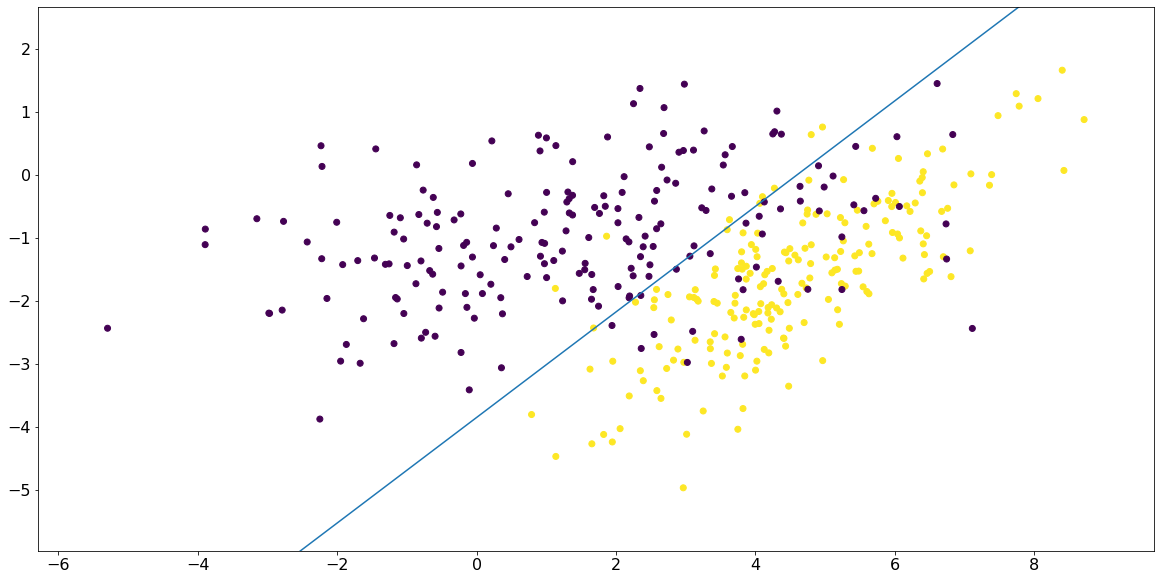

In [136]:
max_epoch = 20

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]

fig, ax = plt.subplots()
fig.set_size_inches(20,10)
ax.scatter(X[:,0], X[:,1], c=y)
x_min, x_max = X[:, 0].min(), X[:, 0].max()
y_min, y_max = X[:, 1].min(), X[:, 1].max()

model = LogReg(alpha=.01, max_epoch=20, C = 100)
model.fit(X, y)

print("theta = ", model.theta)

t0 = model.theta.item(0)
t1 = model.theta.item(1)
t2 = model.theta.item(2)

x_ = np.array([x_min, x_max])
y_ = -(x_ * t0 + t2) / t1

ax.plot(x_, y_)
ax.set_xlim(x_min - 1, x_max + 1)
ax.set_ylim(y_min - 1, y_max + 1)
plt.show()

LinReg c L2

In [140]:
from sklearn.base import BaseEstimator, RegressorMixin

class LinReg(BaseEstimator, RegressorMixin):
    
    def __init__(self, batch_size=25, num_steps=350, lr=1e-2, alpha=0.1):
        #Коэф. регуляризации
        self.alpha = alpha
        self.batch_size = batch_size
        self.num_steps = num_steps
        self.lr = lr
    def __l2_penalty(self):
        return 1/self.C * self.theta
    def fit(self, X, Y):
        w = np.random.randn(X.shape[1])[:, None]
        n_objects = len(X)

        for i in range(self.num_steps):
            sample_indices = np.random.randint(0, n_objects, size=batch_size)
            w -= 2 * self.lr * (np.dot(X[sample_indices].T, np.dot(X[sample_indices], w) - Y[sample_indices]) + self.alpha*w)/ self.batch_size

        self.w = w
        return self

    def predict(self, X):
        return X@self.w

In [141]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

#Генерация данных для тестирования
n_features = 700
n_objects = 100000

w_true = np.random.uniform(-2, 2, (n_features, 1))

X = np.random.uniform(-100, 100, (n_objects, n_features)) * np.arange(n_features)
Y = X.dot(w_true) + np.random.normal(0, 10, (n_objects, 1))
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y)
scaler = StandardScaler()
scaler.fit(x_train)
x_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)
own_model = LinReg().fit(x_scaled, y_train)
y_pred = own_model.predict(x_test_scaled)
own_r2 = r2_score(y_test, y_pred)

sklearn_model = LinearRegression().fit(x_scaled, y_train)
y_pred = sklearn_model.predict(x_test_scaled)

sklearn_r2 = r2_score(y_test, y_pred)
print('R^2 in own model:', own_r2)
print('R^2 in sklearn loss:', sklearn_r2)

R^2 in own model: 0.9802883331542115
R^2 in sklearn loss: 0.9999999997969352
